# Skill level 1: Steady-state calculations of thermal loads in winter and summer

## Plan of the building


# Draw the plan of a two-zone building



[texte du lien](https:// [texte du lien](https://))

Léa BOURDIE - Lucie DUMAS - Louis CHLEBOWSKY - Romain BLOCH

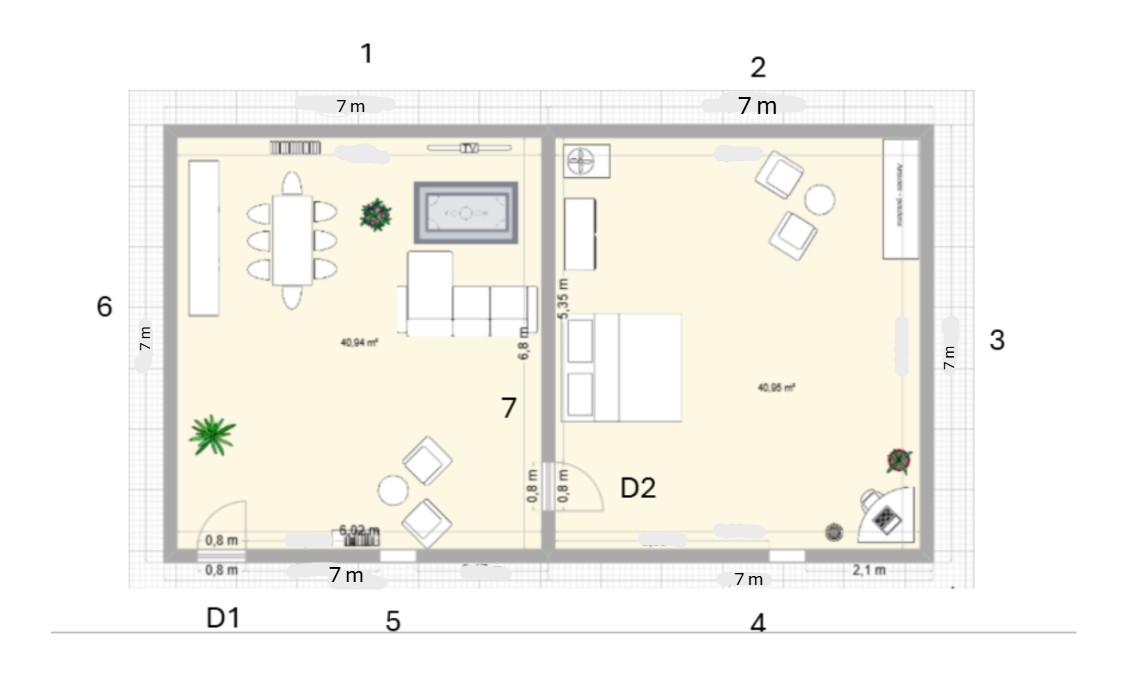



# Hypothesis for boundary conditions.

1.   We consider that the ceiling and the ground are adiabatic, therefore there are no exchanges of heat on those surfaces
2.   Steady-state assumption: $\frac{\partial T}{\partial t} = 0$
3.  Equivalent homogeneous walls : Heat flow through each wall uses Fourier’s law:  $\phi = \frac{T_{int}- T_{ext}}{R}$
4.   Simplified convection and radiation: Use constant convective heat transfer coefficients : $h_{int}, h_{ext}$
5. We consider that the walls number 1, 2, 3 and 6 are adiabatic due to the presence of a house next to our building. Only the walls oriented to the south are exposed to the sun.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import dm4bem

For the materials we chose :

*   Wall : we consider a concrete ([concrete data](https://energieplus-lesite.be/donnees/enveloppe44/enveloppe2/conductivite-thermique-des-materiaux/#Les_blocs_de_beton_avec_granulats_ordinaires)) wall isolated with wood fiber in the interior ([Isonat Flex 40](https://www.isover.fr/nous-connaitre/nos-actualites/isonat-flex-40-lisolant-bio-source-le-plus-economique-du-marche))
*   Window : we chose the helleux menuiseries window ([HM window properties](https://www.helleux.fr/conseils/89-qu-est-ce-que-le-coefficient-thermique-d-une-fenetre-ug-uf-uw.html))


See the drawings after.

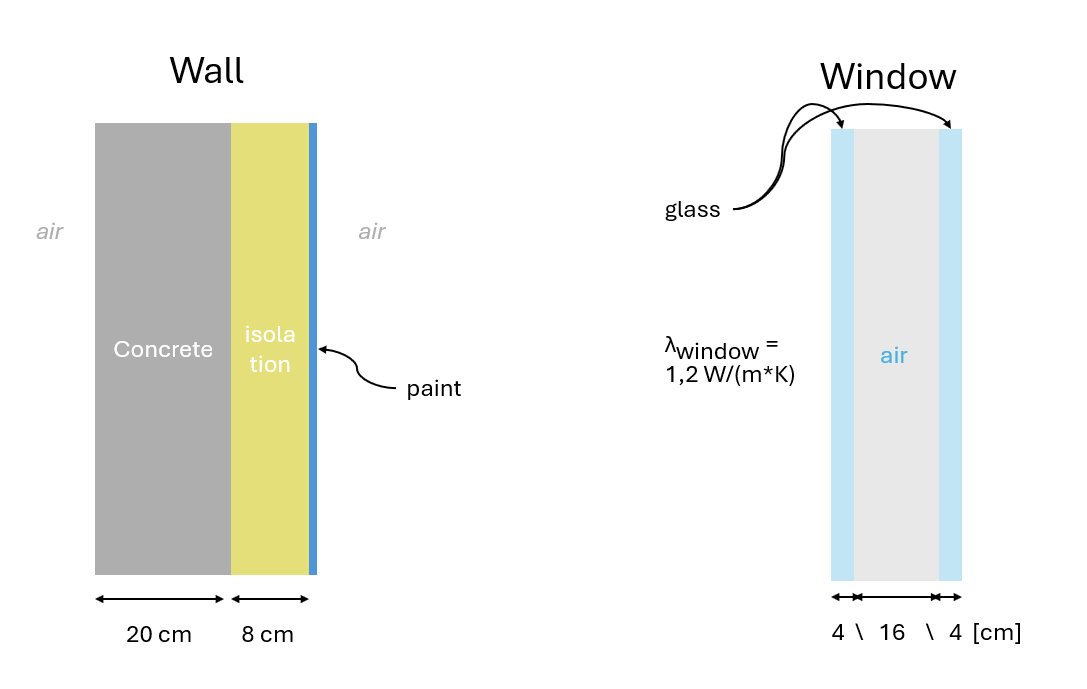

### Schéma **electrique**

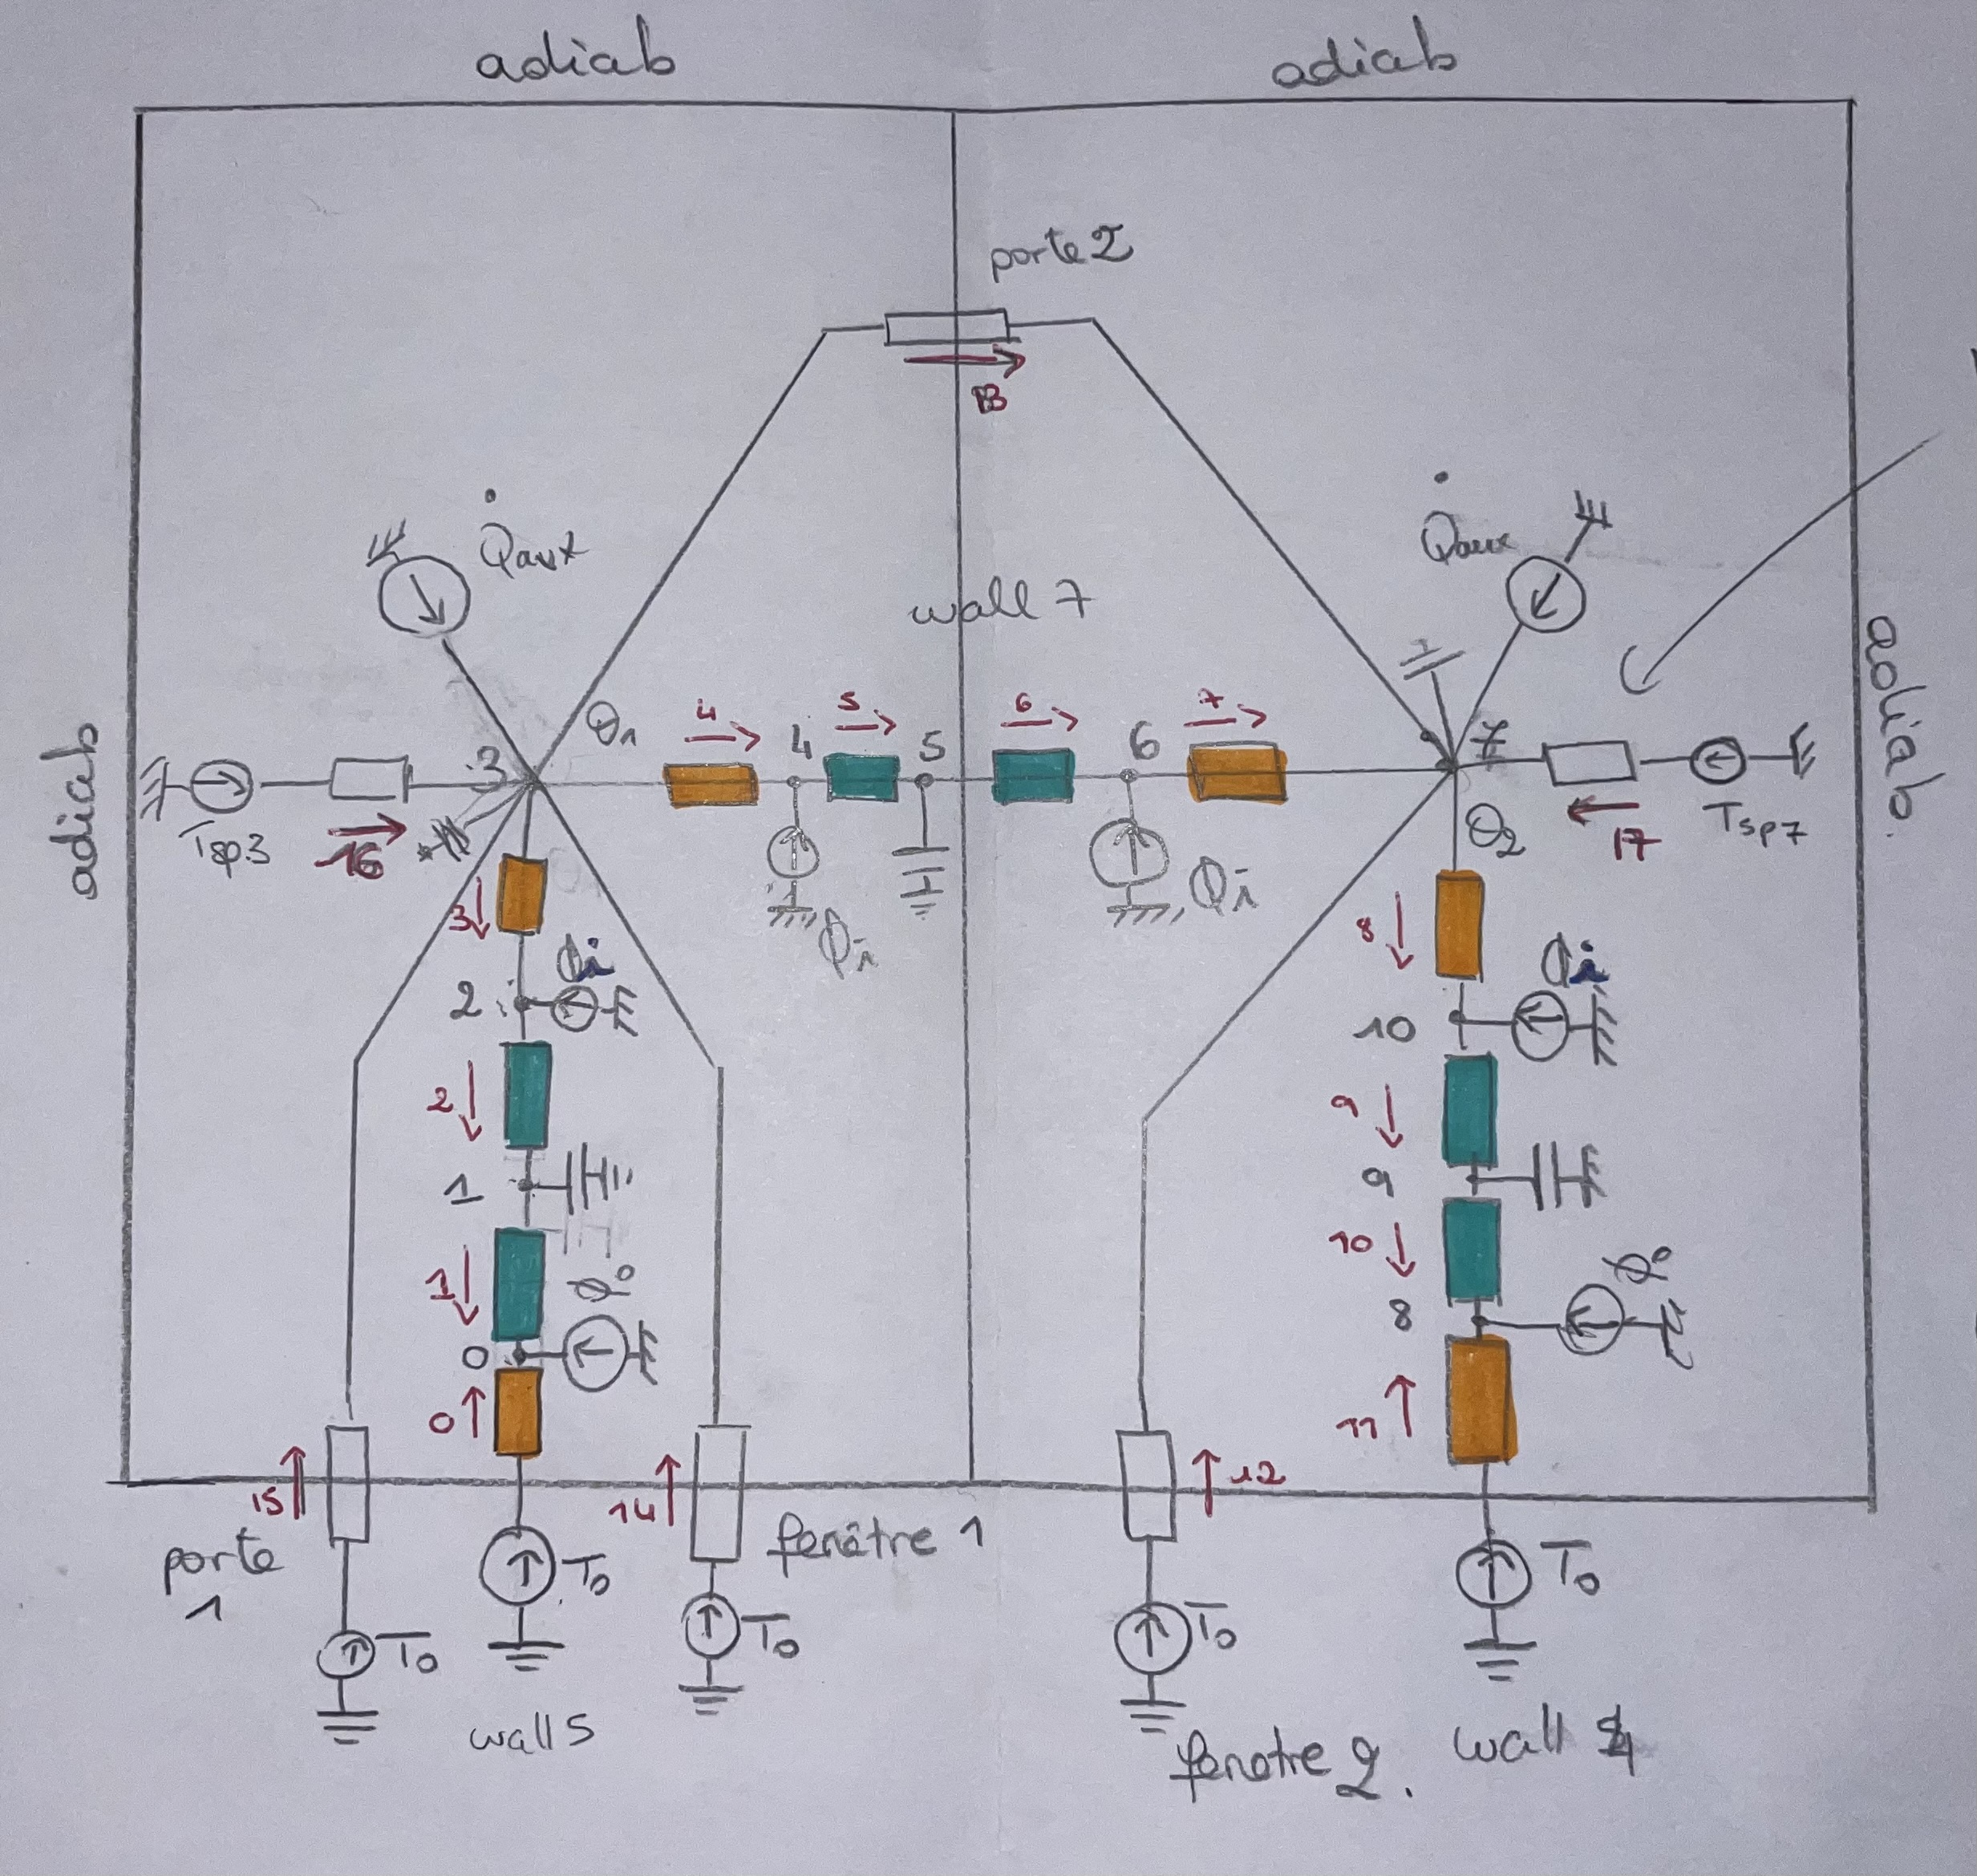


# Calculate the thermal conductances for conduction


Here we look into the total conductivity of the wall with his two components: concrete and isolation:
$$
\lambda_{\text{eq}} = \frac{\text{Total Width}}{\text{Total Resistance (R)}} = \frac{\sum_{i=1}^{n} e_i}{\sum_{i=1}^{n} \frac{e_i}{\lambda_i}}
$$

And of the equivalent heat capacity :

$$
c_{\text{eq}} = \frac{\text{Total Heat Capacity}}{\text{Total Mass}} = \frac{\sum_{i=1}^{n} \rho_i \cdot c_i \cdot e_i}{\sum_{i=1}^{n} \rho_i \cdot e_i}
$$


At this step, we calculate the **thermal conductance by conduction** $G_{cd}$
 , which quantifies how easily heat flows through the wall; it depends on the wall’s material conductivity, thickness, and surface area :

$$
G_{\text{cd}} = \frac{\lambda}{e} \cdot S
$$


# Calculate the thermal conductances for convection


At this step, we compute the **convective thermal power** $ G $ transferred through the wall and the glass.  
This power depends on the indoor and outdoor surface heat transfer coefficients ($ h_{\text{in}}, h_{\text{out}} $),  
the surface areas ($ S_{\text{wall}}, S_{\text{glass}} $), and the temperature difference between inside and outside ($ \Delta T $).

For the wall, the convective thermal power is:

$$
G_{\text{wall}} = \left( h_{\text{in}} \cdot S_{\text{wall}} + h_{\text{out}} \cdot S_{\text{wall}} \right) \cdot \Delta T
$$

For the glass, it is:

$$
G_{\text{glass}} = \left( h_{\text{in}} \cdot S_{\text{glass}} + h_{\text{out}} \cdot S_{\text{glass}} \right) \cdot \Delta T
$$

These expressions follow from the general heat transfer formula by convection:

$$
\Phi = h \cdot S \cdot \Delta T = G \cdot \Delta T
$$

and apply it to both surfaces with contributions from both indoor and outdoor convection.

For the h, we chose :

$$
h = 7 \text{W/(m²·K)}
$$

# Calculate the thermal conductances for long-wave radiation

# Calculate the thermal conductances for advection (heater and ventilation)

In [10]:
# ventilation flow rate
Va = l**3                   # m³, volume of air
ACH = 1                     # 1/h, air changes per hour
Va_dot = ACH / 3600 * Va    # m³/s, air infiltration

# ventilation & advection
Gv = air['Density'] * air['Specific heat'] * Va_dot


## Calculations for the thermal resistance of the wall

# Calculate the thermal capacities

At this step, we compute the \textbf{thermal capacities} of the building elements (wall and air).  
These values represent the amount of energy required to increase the temperature of the corresponding element by one kelvin.  
They are essential for modeling the dynamic thermal behavior of the system.

The general formula for thermal capacity is:

$$
C = \rho \cdot c \cdot e \cdot S
$$



*   $\rho$ is the density [kg/m³]
*   c is the specific heat [J/(kg·K)]
*   e is the thickness [m]
*   S is the surface area [m²]

We then calculate the total thermal capacity of the system as:

$$
C_{\text{tot}} =
\left\{
\begin{array}{l}
C_{\text{wall}} = C_{\text{concrete}} + C_{\text{insulation}} \quad \text{[J/K]} \\
C_{\text{air}} = \rho_{\text{air}} \cdot c_{\text{air}} \cdot V_{\text{air}} \quad \text{[J/K]}
\end{array}
\right.
$$

This gives us a scalar value for each component that will be used in the thermal model to account for their respective thermal inertias.



# Define the inputs: temperature sources (vector b) and flow rate sources (vector f)

# Write in Python the incidence matrix A, the conductance matrix G and the capacity matrix C of the system of Algebraic Differential Equations (DAE)

At this step, we calculate the internal temperature distribution of the system by considering radiative fluxes and internal heat sources.

The external and internal radiative fluxes are calculated based on the following properties:
$$
\Phi_o = \alpha_{\text{wSW}} \cdot E \cdot S \quad \text{[W]}
$$

$$
\Phi_i = \tau_{\text{gSW}} \cdot \alpha_{\text{gSW}} \cdot E \cdot S \quad \text{[W]}
$$

Where:
* $ \alpha_{\text{wSW}} $ is the short-wave absorptivity of the wall surface,
* $ \alpha_{\text{gSW}} $ is the short-wave absorptivity of the glass,
* $ \tau_{\text{gSW}} $ is the short-wave transmittance of the glass,
* $ E $ is the total irradiance received by the wall or window,
* $ S $ is the surface area of the wall or window.

Next, the temperature distribution $ \theta $ is calculated by solving a system of linear equations, taking into account the heat fluxes and internal heat generation $ Q_a $ (from the occupants and equipment). The system of equations is given by:

$$
\theta = (A^T G^{-1} A)^{-1} A^T G^{-1} b
$$

Where:
* $ A $ is the matrix of coefficients,
* $ G $ is the matrix of conductance,
* $ b $ is the vector representing boundary conditions (temperatures).

Finally, the resulting temperature vector $ \theta $ gives the temperatures at each node in the system.




In [11]:
import numpy as np

A = np.zeros([18, 11])

A[0,0], A[1,0], A[2,1], A[3,2], A[4,4], A[5,5], A[6,6], A [7,7], A[8,10], A[9,9], A[10,8], A[11,8], A[12,7], A[13,7], A[14, 3], A[15,3], A[17,7], A[16,3]= 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
A[1,1], A[2,2], A[3,3], A[4,3], A[5,4], A[6, 5], A[7, 6], A[8,7], A[9, 10], A[10,9], A[13,3] = -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1


L = 7              # L length of the room
H = 2.50              # H is the height of the walls



Qa = 1200 # 3 personnes (100W*3) + eclairage/equipement (10W*91m2) = 1210W

# radiative properties
ε_wLW = 0.85    # long wave emmisivity: wall surface (concrete)
ε_gLW = 0.90    # long wave emmisivity: glass pyrex
α_wSW = 0.25    # short wave absortivity: white smooth surface
α_gSW = 0.38    # short wave absortivity: reflective blue glass
τ_gSW = 0.30    # short wave transmitance: reflective blue glass

S_door = 0.8 * 2
S_glass = 1       
S_wall = H*L

V_air = L * L * H

h = 7

lmbda_beton = 1.75
lmbda_isolant = 0.035
lmbda_placo = 0.25
lmbda_glass = 1
lmbda_door = 0.18

e_door = 0.05
e_glass = 0.008
#demi epaisseur
e_beton = 0.12
e_isolant = 0.05
e_placo = 0.02


rho_beton = 2400
rho_isolant = 30
rho_placo = 850
rho_air = 1.2

c_beton = 900
c_isolant = 1400
c_placo = 1100
c_air = 1005

G_cv_wall = h * S_wall

G_cd_wall_beton = (lmbda_beton / e_beton) * S_wall
G_cd_wall_isolant = (lmbda_isolant / e_isolant) * S_wall
G_cd_wall_placo = (lmbda_placo / e_placo) * S_wall

G_cd_glass = lmbda_glass / e_glass * S_glass
G_cd_door = lmbda_door / e_door * S_door

K3 = 10**5
K7 = 10**5


G = np.array(np.hstack(
    [G_cv_wall,
     2*G_cd_wall_beton,
     2*G_cd_wall_isolant,
     G_cv_wall,
     G_cv_wall,
     2*G_cd_wall_placo,
     2*G_cd_wall_isolant,
     G_cv_wall,
     G_cv_wall,
     2*G_cd_wall_beton,
     2*G_cd_wall_isolant,
     G_cv_wall,
     G_cd_glass,
     G_cd_door,
     G_cd_glass,
     G_cd_door,
     K3,
     K7]))


C_air = rho_air * c_air * V_air
C_beton = rho_beton * c_beton * e_beton * S_wall
C_isolant = rho_isolant * c_isolant * e_isolant * S_wall
C_placo = rho_placo * c_placo * e_placo * S_wall
C_wall_ext = C_beton + C_isolant
C_wall_int = C_placo + C_isolant


no_θ = 11
C = np.zeros(no_θ)
C[1] = C[9] = C_wall_ext
C[5] = C_wall_int
C[3] = C[7] = C_air
C = np.diag(C)

# print(f'C = {np.around(C, 2)}')


To = -5
Ti_sp = 22


E = 50 #total irradiance receivend by the wall or window
S = L*H   ####### A VERIFIER 

Φo = α_wSW*E*S
Φi = τ_gSW*α_gSW*E*S
# print(Φo)
# print(Φi)


#DAE 

f = np.array([Φo, 0, Φi, Qa, Φi, 0, Φi, Qa, Φo, 0, Φi])
#f = np.zeros(11)
b = np.zeros(18)
b[[0, 11,12,14,15]]= -5
b[[16,17]]= 22

G_mat = np.diag(G)
At = A.T

θ = np.linalg.inv(At @ G_mat @ A) @ (At @ G_mat @ b + f)
print(f'θ = {np.around(θ, 2)} °C')

Error1 = Ti_sp - θ[3]
Error2 = Ti_sp - θ[7]

q1 = K3*Error1
q2 = K7*Error2

print(q1)
print(q2)


θ = [ 0.38  1.24 19.2  21.97 22.79 22.79 22.79 21.98  0.38 18.34 19.2 ] °C
2567.593704697657
2412.511746723567


# Write in Python the vectors of pointers to the temperature sources b, flow-rate sources f, and outputs y


At this step, we calculate the internal temperature distribution of the system by considering radiative fluxes and internal heat sources.

**External and Internal Radiative Fluxes**

The external and internal radiative fluxes are calculated based on the following properties:

$$
\Phi_o = \alpha_{\text{wSW}} \cdot E \cdot S \quad \text{[W]}
$$

$$
\Phi_i = \tau_{\text{gSW}} \cdot \alpha_{\text{gSW}} \cdot E \cdot S \quad \text{[W]}
$$

where:
* $ \alpha_{\text{wSW}} $ is the short-wave absorptivity of the wall surface
* $ \alpha_{\text{gSW}} $ is the short-wave absorptivity of the glass
* $ \tau_{\text{gSW}} $ is the short-wave transmittance of the glass
* $ E $ is the total irradiance received by the wall or window
* $ S $ is the surface area of the wall or window

**Temperature Distribution**

The temperature distribution $ \theta $ is calculated by solving a system of linear equations, taking into account heat fluxes and internal heat generation $ Q_a $:

$$
\theta = (A^T G^{-1} A)^{-1} A^T G^{-1} b
$$

where:
* $ A $ is the matrix of coefficients
* $ G $ is the matrix of conductance
* $ b $ is the vector representing boundary conditions (temperatures)

**Heat Source Correction**

Finally, the errors between the desired temperature and the calculated temperature allow us to adjust the required thermal power:

$$
q_1 = K_3 \cdot (T_{i,sp} - \theta_3)
$$

$$
q_2 = K_7 \cdot (T_{i,sp} - \theta_7)
$$

where:
* $ K_3 $ and $ K_7 $ are thermal correction coefficients
* $ T_{i,sp} $ is the setpoint indoor temperature
* $ \theta_3, \theta_7 $ are the calculated temperatures at the relevant nodes



In [12]:

C_values = np.zeros(11)
C_values[1] = C_values[9] = C_wall_ext
C_values[5] = C_wall_int
C_values[3] = C_values[7] = C_air 

C = pd.Series(C_values, index=θ)


# temperature nodes
nθ = 11
θ = [f'θ{i}' for i in range(nθ)]

# flow rate branches
nq = 18
q = [f'q{i}' for i in range(nq)]

# redéfinir f avec bon index
f_values = ['Φo', 0, 'Φi','Qa','Φi',0 ,'Φi','Qa','Φo',0, 'Φi']
f = pd.Series(f_values, index=θ)

y_values = [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
y = pd.Series(y_values, index=θ)

# ensuite : A, G, C, b doivent tous avoir des dimensions et des index cohérents
A = pd.DataFrame(A, index=q, columns=θ)
G = pd.Series(G, index=q)
C = pd.Series(C_values, index=θ)
b = pd.Series(b, index=q)

TC = {"A": A,
      "G": G,
      "C": C,
      "b": b,
      "f": f,
      "y": y}
[As, Bs, Cs, Ds, us] = dm4bem.tc2ss(TC)

print("As =\n", As)
print("\nBs =\n", Bs)
print("\nCs =\n", Cs)
print("\nDs =\n", Ds)
print("\nus =\n", us)

# En steady state : 

bss1 = np.zeros(18)
bss1[[0,11,12,14,15]]= -5
bss1[[16,17]]= 22

fss1 = np.zeros(11)         # flow-rate sources f for steady state

# Steady-state from differential algebraic equations (DAE)

diag_G= pd.DataFrame(np.diag(G), index=G.index, columns=G.index)
θss = np.linalg.inv(A.T @ diag_G @ A) @ (A.T @ diag_G @ bss1 + fss1)
print(f'θss = {np.around(θss, 2)} °C')


#Avec source Qa : 

fss2 = np.array([Φo, 0, Φi, Qa, Φi, 0, Φi, Qa, Φo, 0, Φi])
diag_G = pd.DataFrame(np.diag(G), index=G.index, columns=G.index)
θssQ = np.linalg.inv(A.T @ diag_G @ A) @ (A.T @ diag_G @ bss1 + fss2)
print(f'θssQ = {np.around(θssQ, 2)} °C')


# Steady-state from state-space representation
# sans source Qa 

bT1 = np.array([To,To,To,To, To, Ti_sp,Ti_sp ])    # [To, To, To, To, To, Tisp, Tisp]
fQ1 = np.array([0, 0, 0, 0, 0, 0, 0, 0])
uss1 = np.hstack([bT1, fQ1])           # input vector for state space
print(f'uss1 = {uss1}')


inv_As = pd.DataFrame(np.linalg.inv(As),
                      columns=As.index, index=As.index)
yss = (-Cs @ inv_As @ Bs + Ds) @ uss1

yss = float(yss.values[0])
print(f'yss = {yss:.2f} °C')

print(f'Error between DAE and state-space (noeud 7): {abs(θss[7] - yss):.2e} °C')
print(f'Error between DAE and state-space  (noeud 3): {abs(θss[3] - yss):.2e} °C')
#avec Qa 

bT2 = np.array([To,To,To,To, To, Ti_sp,Ti_sp ])       # [To, To, To, Tisp]
fQ2 = np.array([Φo, Φi, Qa, Φi, Φi, Φo, Φo, Φi])     # [Φo, Φi, Qa, Φa]
uss2 = np.hstack([bT2, fQ2])

inv_As = pd.DataFrame(np.linalg.inv(As),
                      columns=As.index, index=As.index)
yssQ = (-Cs @ inv_As @ Bs + Ds) @ uss2

yssQ = float(yssQ.values[0])
print(f'yssQ = {yssQ:.2f} °C')

print(f'Error between DAE and state-space avec source (noeud 7): {abs(θssQ[7] - yssQ):.2e} °C')
print(f'Error between DAE and state-space  avec source (noeud 3): {abs(θssQ[3] - yss):.2e} °C')


controller = False
neglect_air_glass_capacity = False
imposed_time_step = True
Δt = 498    # s, imposed time step

# Eigenvalues analysis
λ = np.linalg.eig(As)[0]        # eigenvalues of matrix As

# time step
Δtmax = 2 * min(-1. / λ)    # max time step for stability of Euler explicit
dm4bem.print_rounded_time('Δtmax', Δtmax)

if imposed_time_step:
    dt = Δt
else:
    dt = dm4bem.round_time(Δtmax)
dm4bem.print_rounded_time('dt', dt)

if dt < 10:
    raise ValueError("Time step is too small. Stopping the script.")

# settling time
t_settle = 4 * max(-1 / λ)
dm4bem.print_rounded_time('t_settle', t_settle)

# duration: next multiple of 3600 s that is larger than t_settle
duration = np.ceil(t_settle / 3600) * 3600
dm4bem.print_rounded_time('duration', duration)



As =
           θ1        θ3        θ5        θ7        θ9
θ1 -0.000026  0.000004  0.000000  0.000000  0.000000
θ3  0.000138 -0.678598  0.000648  0.000039  0.000000
θ5  0.000000  0.000263 -0.000319  0.000056  0.000000
θ7  0.000000  0.000039  0.000138 -0.678580  0.000669
θ9  0.000000  0.000000  0.000000  0.000022 -0.000026

Bs =
           q0       q11       q12       q14       q15       q16       q17  \
θ1  0.000022  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
θ3  0.000000  0.000000  0.000000  0.000846  0.000039  0.676888  0.000000   
θ5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
θ7  0.000000  0.000000  0.000846  0.000000  0.000000  0.000000  0.676888   
θ9  0.000000  0.000004  0.000000  0.000000  0.000000  0.000000  0.000000   

              θ0            θ2        θ3        θ4            θ6        θ7  \
θ1  1.763603e-07  3.644780e-08  0.000000  0.000000  0.000000e+00  0.000000   
θ3  0.000000e+00  5.640731e-06  0.000007  0.000001  0.00

In [13]:
#Step response to outdoor temperature


# Vecteur de temps
n = int(np.floor(duration / dt))
time = pd.date_range(start="2000-01-01 00:00:00", periods=n, freq=f"{int(dt)}s")

# Initialisation des données
T0 = -5 * np.ones(n)
Ti_sp  = 22 * np.ones(n)
Φi = Φi * np.ones(n)        # solar radiation absorbed by the glass
Qa = Qa * np.ones(n)
Φo = Φo * np.ones(n)           # auxiliary heat sources and solar radiation

# Création du DataFrame
data = {
    'q0': T0,
    'q11': T0,
    'q12': T0,
    'q14': T0,
    'q15': T0,
    'q16': T0,
    'q17': T0,
    'θ0': Φo, 
    'θ2': Φi, 
    'θ3': Qa, 
    'θ4': Φi, 
    'θ6': Φi, 
    'θ7': Qa, 
    'θ8': Φo,
    'θ10': Φi, 

}
input_data_set = pd.DataFrame(data, index=time)


# inputs in time from input_data_set
u = input_data_set[us.index]
print(u)

#u = dm4bem.inputs_in_time(us, input_data_set)

                      q0  q11  q12  q14  q15  q16  q17      θ0     θ2      θ3  \
2000-01-01 00:00:00 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0  218.75  99.75  1200.0   
2000-01-01 00:08:18 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0  218.75  99.75  1200.0   
2000-01-01 00:16:36 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0  218.75  99.75  1200.0   
2000-01-01 00:24:54 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0  218.75  99.75  1200.0   
2000-01-01 00:33:12 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0  218.75  99.75  1200.0   
...                  ...  ...  ...  ...  ...  ...  ...     ...    ...     ...   
2000-01-02 18:11:30 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0  218.75  99.75  1200.0   
2000-01-02 18:19:48 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0  218.75  99.75  1200.0   
2000-01-02 18:28:06 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0  218.75  99.75  1200.0   
2000-01-02 18:36:24 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0  218.75  99.75  1200.0   
2000-01-02 18:44:42 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0 -5.0  218.75  99.75  1200.0   

                        θ4 

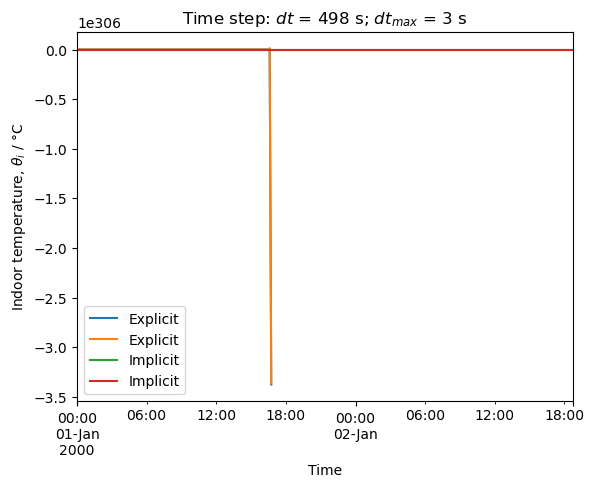

Steady-state indoor temperature obtained with:
- DAE model: 21.9743 °C
- DAE model: 21.9759 °C
- state-space model: 21.9743 °C
- steady-state response to step input: nan °C
- steady-state response to step input: nan °C


In [14]:
# Initial conditions


#Time integration

# Initial conditions
θ_exp = pd.DataFrame(index=u.index)     # empty df with index for explicit Euler
θ_imp = pd.DataFrame(index=u.index)     # empty df with index for implicit Euler


θ0 = 0.0

θ_exp[As.columns] = θ0      # fill θ for Euler explicit with initial values θ0
θ_imp[As.columns] = θ0      # fill θ for Euler implicit with initial values θ0

I = np.eye(As.shape[0])     # identity matrix
for k in range(u.shape[0] - 1):
    θ_exp.iloc[k + 1] = (I + dt * As)\
        @ θ_exp.iloc[k] + dt * Bs @ u.iloc[k]
    θ_imp.iloc[k + 1] = np.linalg.inv(I - dt * As)\
        @ (θ_imp.iloc[k] + dt * Bs @ u.iloc[k])

# outputs
y_exp = (Cs @ θ_exp.T + Ds @  u.T).T
y_imp = (Cs @ θ_imp.T + Ds @  u.T).T

# plot results
y = pd.concat([y_exp, y_imp], axis=1, keys=['Explicit', 'Implicit'])
# Flatten the two-level column labels into a single level
y.columns = y.columns.get_level_values(0)
ax = y.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Indoor temperature, $\\theta_i$ / °C')
ax.set_title(f'Time step: $dt$ = {dt:.0f} s; $dt_{{max}}$ = {Δtmax:.0f} s')
plt.show()

print('Steady-state indoor temperature obtained with:')
print(f'- DAE model: {float(θssQ[3]):.4f} °C')
print(f'- DAE model: {float(θssQ[7]):.4f} °C')
print(f'- state-space model: {float(yssQ):.4f} °C')
print(f'- steady-state response to step input: \
{y_exp["θ3"].tail(1).values[0]:.4f} °C')
print(f'- steady-state response to step input: \
{y_exp["θ7"].tail(1).values[0]:.4f} °C')

